## Transfer Learning with MobileNet and Flower Dataset

### Cleaning Dataset (Resizing Images)

In [1]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = []
y = []

def resize_image(input_dir, output_dir, output_size):
    for filename in os.listdir(input_dir):
        # Check if the file is an image
        if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
            # Open the image file
            with Image.open(os.path.join(input_dir, filename)) as img:
                img = img.resize(output_size)
                
                X.append(np.asarray(img)/255)
                if input_dir == "daisy": y.append(0)
                elif input_dir == "dandelion": y.append(1)
                elif input_dir == "rose": y.append(2)
                elif input_dir == "sunflower": y.append(3)
                else: y.append(4)
                
                img.save(os.path.join(output_dir, filename))
    print("Done resizing images from", input_dir)

In [3]:
resize_image("daisy", "daisy/resized", (224, 224))
resize_image("dandelion", "dandelion/resized", (224, 224))
resize_image("rose", "rose/resized", (224, 224))
resize_image("sunflower", "sunflower/resized", (224, 224))
resize_image("tulip", "tulip/resized", (224, 224))

Done resizing images from daisy
Done resizing images from dandelion
Done resizing images from rose
Done resizing images from sunflower
Done resizing images from tulip


In [4]:
# X and y sets
X = np.array(X)
y = np.array(y)

X.shape, y.shape

((4317, 224, 224, 3), (4317,))

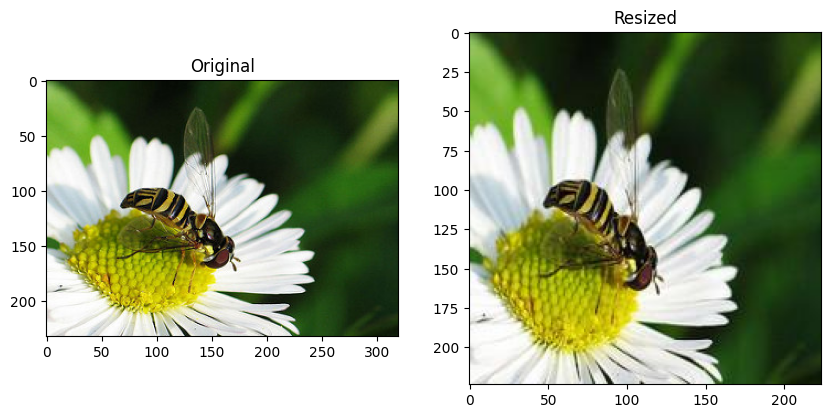

In [5]:
# For daisy dataset
original_im = np.array(Image.open('daisy/5547758_eea9edfd54_n.jpg'))
resize_im = np.array(Image.open('daisy/resized/5547758_eea9edfd54_n.jpg'))
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(original_im)
axs[0].set_title('Original')
axs[1].imshow(resize_im)
axs[1].set_title('Resized')

plt.show()

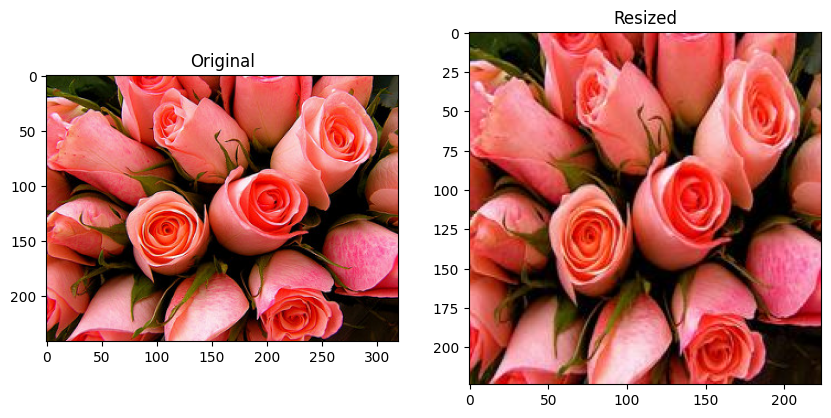

In [6]:
# For rose dataset
original_im = np.array(Image.open('rose/118974357_0faa23cce9_n.jpg'))
resize_im = np.array(Image.open('rose/resized/118974357_0faa23cce9_n.jpg'))
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(original_im)
axs[0].set_title('Original')
axs[1].imshow(resize_im)
axs[1].set_title('Resized')

plt.show()

### Train and Test Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [9]:
X_train.shape, X_test.shape

((3453, 224, 224, 3), (864, 224, 224, 3))

In [10]:
y_train.shape, y_test.shape

((3453,), (864,))

### Fit Pretrained Model (Mobilenet)

In [11]:
import tensorflow as tf
import tensorflow_hub as hub

In [12]:
mobilenet = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet, input_shape=(224, 224, 3), trainable=False)

In [13]:
num_of_classes = 5

model = tf.keras.Sequential([
    pretrained_model, 
    tf.keras.layers.Dense(num_of_classes) # output layer 
])

model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [14]:
model.compile(
    optimizer = 'adam', 
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [15]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
108/108 [==============================] - 49s 421ms/step - loss: 0.7091 - acc: 0.7463
Epoch 2/5
108/108 [==============================] - 46s 428ms/step - loss: 0.3678 - acc: 0.8798
Epoch 3/5
108/108 [==============================] - 52s 477ms/step - loss: 0.2927 - acc: 0.9114
Epoch 4/5
108/108 [==============================] - 50s 461ms/step - loss: 0.2493 - acc: 0.9244
Epoch 5/5
108/108 [==============================] - 46s 428ms/step - loss: 0.2169 - acc: 0.9340


In [17]:
score, acc = model.evaluate(X_test, y_test)
print("Test loss: ", score)
print("Test accuracy:", acc)

27/27 [==============================] - 11s 423ms/step - loss: 0.3013 - acc: 0.8912
Test loss:  0.3012547194957733
Test accuracy: 0.8912037014961243


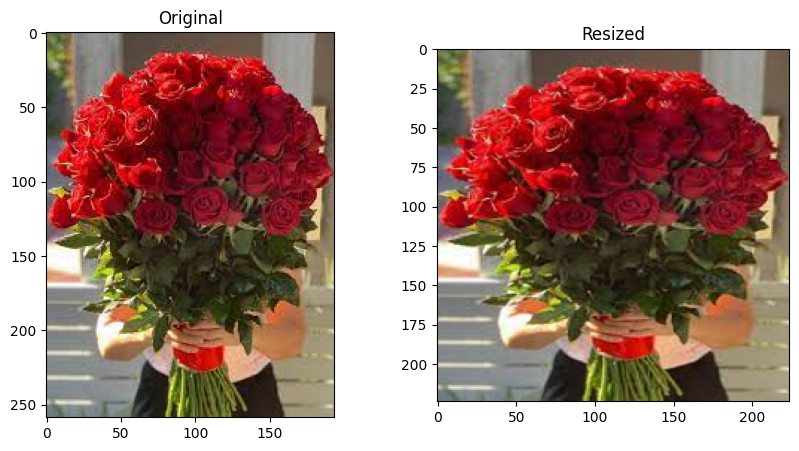

(1, 224, 224, 3)

In [27]:
original_img = Image.open("test_img.jpeg")
resized_img = original_img.resize((224, 224))

original_im = np.array(original_img)
resize_im = np.array(resized_img)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(original_im)
axs[0].set_title('Original')
axs[1].imshow(resize_im)
axs[1].set_title('Resized')

plt.show()

test_img = np.asarray(resized_img)
test_img = test_img/255
test_img = np.reshape(test_img, (1,224,224,3))
test_img.shape

In [31]:
output = ["daisy", "dandelion", "rose", "sunflower", "tulip"]

predictions = model.predict(test_img)
print("Total predictions:", predictions)

prediction = np.argmax(predictions)
print("Predicted: ", output[prediction])

1/1 [==============================] - 0s 43ms/step
Total predictions: [[-4.691383  -6.4001155  1.459134  -2.48833   -1.2871869]]
Predicted:  rose
